## Data Preproccessing

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import load_model

2022-12-09 18:17:07.118559: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 18:17:07.201201: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-09 18:17:07.201216: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-09 18:17:07.666769: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

### how to run and import preproccessed data

There are 5572 rows and 2 columns
  Category                                            Message  Label
0      ham  Go until jurong point, crazy.. Available only ...      0
1      ham                      Ok lar... Joking wif u oni...      0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...      1
3      ham  U dun say so early hor... U c already then say...      0
4      ham  Nah I don't think he goes to usf, he lives aro...      0
5     spam  FreeMsg Hey there darling it's been 3 week's n...      1
6      ham  Even my brother is not like to speak with me. ...      0
7      ham  As per your request 'Melle Melle (Oru Minnamin...      0
8     spam  WINNER!! As a valued network customer you have...      1
9     spam  Had your mobile 11 months or more? U R entitle...      1
Category    0
Message     1
Label       0
dtype: int64
There are 5571 rows and 3 columns
ham     4824
spam     747
Name: Category, dtype: int64


/home/viking/DEV/SpamFilter/datapreprocessing.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['v1', 'v2']), 1, inplace=True)


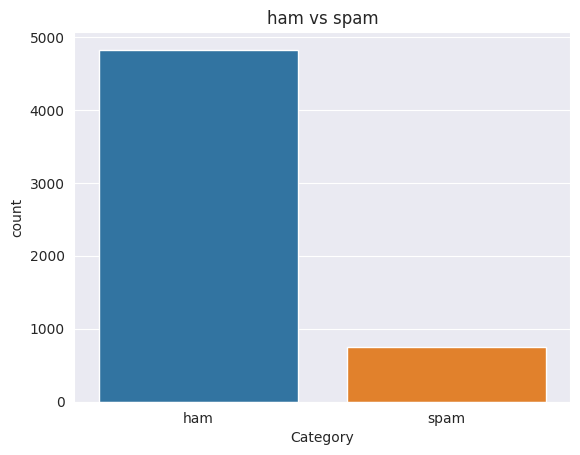

                                             Message  Label
0  go jurong point crazi avail bugi n great world...      0
1                              ok lar joke wif u oni      0
2  free entri wkli comp win fa cup final tkt st m...      1
3                u dun say earli hor u c alreadi say      0
4               nah think goe usf live around though      0
X_train: (4456,)


/home/viking/DEV/SpamFilter/datapreprocessing.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(tokenizer.texts_to_sequences(X_train))
/home/viking/DEV/SpamFilter/datapreprocessing.py:96: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test = np.array(tokenizer.texts_to_sequences(X_test))


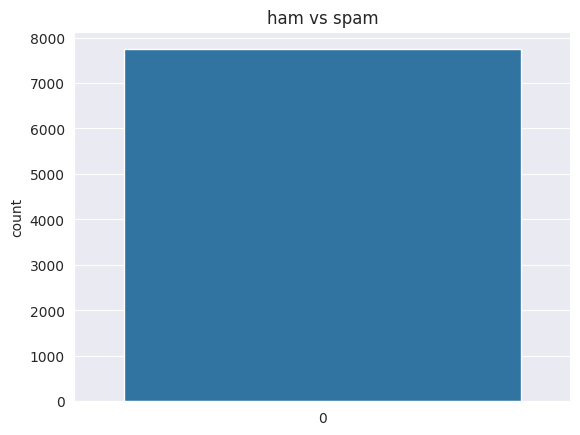

In [2]:
from datapreprocessing import get_cleaned_data
X_train, X_test, y_train, y_test, vocab_size, sentence_len = get_cleaned_data()

### Neural Network with SGD optimizer

In [3]:
# model inspired from https://towardsdatascience.com/spam-detection-in-emails-de0398ea3b48
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional
from keras.optimizers import SGD

LR = .01
MOMENTUM = .5
#size of the output vector from each layer
embedding_vector_length = 32

lstm = tf.keras.Sequential()

lstm.add(Embedding(vocab_size, embedding_vector_length, input_length=sentence_len)) #embedding layer to vectorize
lstm.add(Bidirectional(tf.keras.layers.LSTM(64)))
lstm.add(Dense(16, activation='relu'))
lstm.add(Dropout(0.1)) #prevent overfitting
lstm.add(Dense(1, activation='sigmoid')) # normalize output

lstm.compile(loss='binary_crossentropy', optimizer= SGD(lr=LR, momentum=MOMENTUM), metrics=['accuracy'] )

print(lstm.summary())



2022-12-09 18:17:13.499468: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 18:17:13.499695: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-09 18:17:13.499738: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-09 18:17:13.499771: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-09 18:17:13.499804: W tensorflow/c

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49664     
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 371,745
Trainable params: 371,745
Non-trainable params: 0
__________________________________________________

/home/viking/DEV/Cryoto/API/SpamFilter/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [4]:
BATCH_SIZE = 512
EPOCHS = 17

lstm.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/17
16/16 [==============================] - 7s 340ms/step - loss: 0.6911 - accuracy: 0.6325 - val_loss: 0.6901 - val_accuracy: 0.7166
Epoch 2/17
16/16 [==============================] - 5s 310ms/step - loss: 0.6903 - accuracy: 0.7007 - val_loss: 0.6902 - val_accuracy: 0.6861
Epoch 3/17
16/16 [==============================] - 5s 297ms/step - loss: 0.6894 - accuracy: 0.7233 - val_loss: 0.6910 - val_accuracy: 0.6386
Epoch 4/17
16/16 [==============================] - 5s 324ms/step - loss: 0.6885 - accuracy: 0.7307 - val_loss: 0.6902 - val_accuracy: 0.6484
Epoch 5/17
16/16 [==============================] - 5s 338ms/step - loss: 0.6875 - accuracy: 0.7431 - val_loss: 0.6914 - val_accuracy: 0.5865
Epoch 6/17
16/16 [==============================] - 5s 320ms/step - loss: 0.6865 - accuracy: 0.7337 - val_loss: 0.6880 - val_accuracy: 0.6789
Epoch 7/17
16/16 [==============================] - 5s 325ms/step - loss: 0.6853 - accuracy: 0.7738 - val_loss: 0.6862 - val_accuracy: 0.6960
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


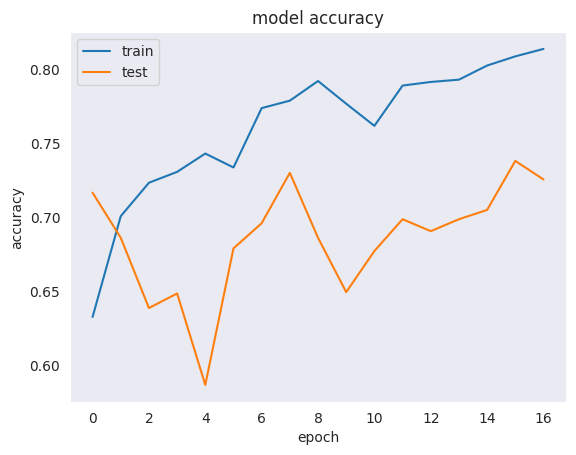

In [5]:
# plot model accuracy
print(lstm.history.history.keys())
plt.plot(lstm.history.history['accuracy'])
plt.plot(lstm.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

### Neural Network with adam optimizer

In [6]:
from keras.layers import Dense, Embedding, Dropout
from keras.layers import Bidirectional

#size of the output vector from each layer
embedding_vector_length = 32

lstm = tf.keras.Sequential()

lstm.add(Embedding(vocab_size, embedding_vector_length, input_length=sentence_len)) #embedding layer to vectorize
lstm.add(Bidirectional(tf.keras.layers.LSTM(64)))
lstm.add(Dense(16, activation='relu'))
lstm.add(Dropout(0.1)) #prevent overfitting
lstm.add(Dense(1, activation='sigmoid')) # normalize output

lstm.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'] )

print(lstm.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 371,745
Trainable params: 371,745
Non-trainable params: 0
________________________________________________

In [7]:
BATCH_SIZE = 512
EPOCHS = 17

lstm.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/17
16/16 [==============================] - 7s 321ms/step - loss: 0.6543 - accuracy: 0.6463 - val_loss: 0.4122 - val_accuracy: 0.8753
Epoch 2/17
16/16 [==============================] - 5s 290ms/step - loss: 0.4480 - accuracy: 0.8301 - val_loss: 0.2654 - val_accuracy: 0.8951
Epoch 3/17
16/16 [==============================] - 5s 293ms/step - loss: 0.3329 - accuracy: 0.8773 - val_loss: 0.2903 - val_accuracy: 0.8726
Epoch 4/17
16/16 [==============================] - 5s 291ms/step - loss: 0.2733 - accuracy: 0.8987 - val_loss: 0.2085 - val_accuracy: 0.9121
Epoch 5/17
16/16 [==============================] - 5s 292ms/step - loss: 0.2167 - accuracy: 0.9250 - val_loss: 0.1817 - val_accuracy: 0.9283
Epoch 6/17
16/16 [==============================] - 5s 295ms/step - loss: 0.1701 - accuracy: 0.9492 - val_loss: 0.1273 - val_accuracy: 0.9552
Epoch 7/17
16/16 [==============================] - 5s 297ms/step - loss: 0.1399 - accuracy: 0.9572 - val_loss: 0.1534 - val_accuracy: 0.9480
Epoch 

In [8]:
# save model 
lstm.save('lstmModel.h5')
print('Model Saved!')
 
# load model
savedModel=load_model('lstmModel.h5')
savedModel.summary()

Model Saved!
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 371,745
Trainable params: 371,745
Non-trainable params: 0
___________________________________

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


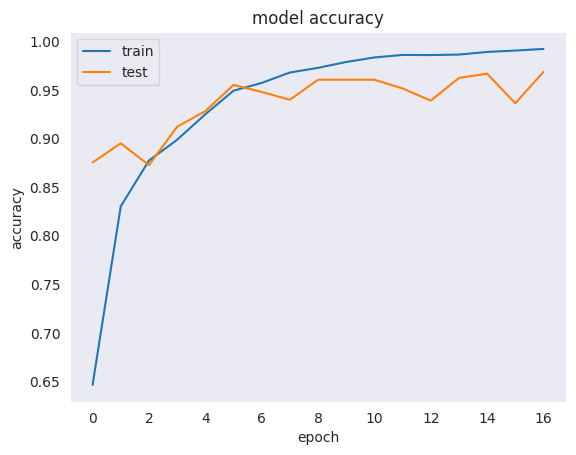

In [9]:
# plot model accuracy
print(lstm.history.history.keys())
plt.plot(lstm.history.history['accuracy'])
plt.plot(lstm.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [10]:
# test our model
y_pred=lstm.predict(X_test)
print(y_pred)
y_pred=(y_pred>0.5) # assign true(spam) if > .5
print(y_pred)

35/35 [==============================] - 1s 16ms/step
[[2.5046984e-04]
 [4.0792825e-04]
 [9.3682474e-01]
 ...
 [1.4881691e-03]
 [1.4706695e-02]
 [4.6923894e-02]]
[[False]
 [False]
 [ True]
 ...
 [False]
 [False]
 [False]]


[Text(0, 0.5, 'Not Spam'), Text(0, 1.5, 'Spam')]

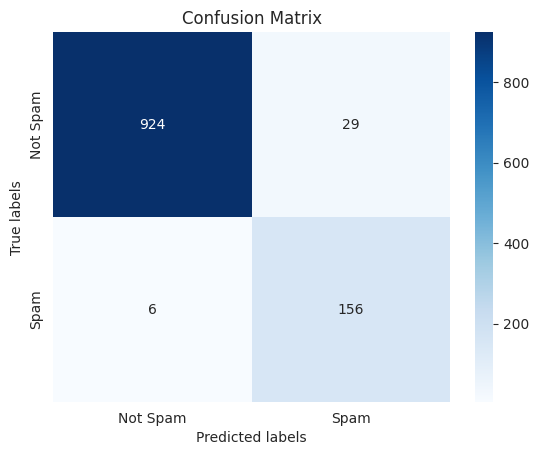

In [11]:
from sklearn.metrics import confusion_matrix,classification_report

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, ax = ax,cmap='Blues',fmt='')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.xaxis.set_ticklabels(['Not Spam', 'Spam'])
ax.set_ylabel('True labels')
ax.yaxis.set_ticklabels(['Not Spam', 'Spam'])

In [12]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       953
           1       0.84      0.96      0.90       162

    accuracy                           0.97      1115
   macro avg       0.92      0.97      0.94      1115
weighted avg       0.97      0.97      0.97      1115

